In [204]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [205]:
df1 = '/content/drive/MyDrive/dsl/googleplaystore.csv'
df2 = '/content/drive/MyDrive/dsl/googleplaystore_user_reviews.csv'

In [206]:
import pandas as pd

data1 = pd.read_csv(df1)
data2 = pd.read_csv(df2)

In [207]:
import numpy as np

In [208]:
data1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [209]:
data2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [210]:
df1 = pd.read_csv(df1)
df2 = pd.read_csv(df2)

In [211]:
data1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [212]:
data1_app_count = pd.DataFrame(data1.groupby('Category').count()['App'])
data1_app_count = data1_app_count.sort_values(by='App', ascending = False)
data1_app_count.head(10)

,App
Category,
FAMILY,1972
GAME,1144
TOOLS,843
MEDICAL,463
BUSINESS,460
PRODUCTIVITY,424
PERSONALIZATION,392
COMMUNICATION,387
SPORTS,384


In [213]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [214]:
def sizing(size):
  if size[-1] == 'M':
    return float(size[:-1])
  elif size[-1] == 'k':
    return float(size[:-1])/1024
  elif size == '1,000+':
    return 1.0
  elif size == '5,000+':
    return 5.0
  elif size == '10,000+':
    return 10.0
  else:
    return np.nan

In [215]:
import sys
sys.setrecursionlimit(10**7)

In [216]:
data1['Size'] = data1['Size'].apply(sizing)
data1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [217]:
df1.sort_values(by = 'Rating', ascending = False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
9511,Ek Bander Ne Kholi Dukan,FAMILY,5.0,10,3.0M,"10,000+",Free,0,Everyone,Entertainment,"June 26, 2017",1.0.9,4.0 and up
10166,FA Player Essentials,SPORTS,5.0,7,68M,100+,Free,0,Everyone,Sports,"July 23, 2018",1.6.0,4.0.3 and up
7895,Dine In CT - Food Delivery,SHOPPING,5.0,4,1.6M,"1,000+",Free,0,Everyone,Shopping,"May 16, 2016",1.3,4.0 and up
5118,Eternal Light AG,SOCIAL,5.0,30,13M,100+,Free,0,Teen,Social,"May 19, 2018",1.04,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [218]:
def ratings(rating):
  if rating > 5:
    return np.nan
  elif rating >= 0:
    return rating
  else:
    return np.nan

In [219]:
data1['Rating'] = data1['Rating'].apply(ratings)

In [220]:
def pricing(price):
  if price[0] == '$':
    return round(float(price[1:]))
  else:
    return 0.0

In [ ]:
data1['Price'] = data1['Price'].apply(pricing)

In [222]:
data1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [223]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [224]:
for category in data1['Category'].unique():
  print(category)

ART_AND_DESIGN
AUTO_AND_VEHICLES
BEAUTY
BOOKS_AND_REFERENCE
BUSINESS
COMICS
COMMUNICATION
DATING
EDUCATION
ENTERTAINMENT
EVENTS
FINANCE
FOOD_AND_DRINK
HEALTH_AND_FITNESS
HOUSE_AND_HOME
LIBRARIES_AND_DEMO
LIFESTYLE
GAME
FAMILY
MEDICAL
SOCIAL
SHOPPING
PHOTOGRAPHY
SPORTS
TRAVEL_AND_LOCAL
TOOLS
PERSONALIZATION
PRODUCTIVITY
PARENTING
WEATHER
VIDEO_PLAYERS
NEWS_AND_MAGAZINES
MAPS_AND_NAVIGATION
1.9


In [225]:
data1.loc[[10472]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,NaN,3.0M,1.0,Free,0,0.0,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [226]:
data1.drop(10472, inplace = True)

In [227]:
data1['Reviews'] = pd.to_numeric(data1['Reviews'])
data1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,"1,000+",Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [228]:
for installs in data1['Installs'].unique():
  print(installs)

10,000+
500,000+
5,000,000+
50,000,000+
100,000+
50,000+
1,000,000+
10,000,000+
5,000+
100,000,000+
1,000,000,000+
1,000+
500,000,000+
50+
100+
500+
10+
1+
5+
0+
0


In [229]:
data1['Installs'] = data1['Installs'].str.replace(',', '', regex = True)

In [230]:
data1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000+,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000+,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000+,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000+,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000+,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000+,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000+,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000+,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [231]:
def removeplus(num):
  if num[-1] == '+':
    return int(num[:-1])
  else:
    return int(num)

In [232]:
data1['Installs'] = data1['Installs'].apply(removeplus)

In [233]:
data1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [234]:
for type in data1['Type'].unique():
  print(type)

Free
Paid
nan


In [235]:
for contentr in data1['Content Rating'].unique():
  print(contentr)

Everyone
Teen
Everyone 10+
Mature 17+
Adults only 18+
Unrated


In [236]:
data1 = data1.drop(['Genres', 'Last Updated', 'Current Ver'], axis = 1)
data1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,4.4 and up
...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0.0,Everyone,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Varies with device


In [237]:
data1.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Android Ver          2
dtype: int64

In [238]:
data1['Rating'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838     True
10839    False
10840    False
Name: Rating, Length: 10840, dtype: bool

In [239]:
from sklearn.impute import SimpleImputer

In [240]:
imputer_m = SimpleImputer(missing_values = np.nan, strategy = 'median')

data1['Size'] = imputer_m.fit_transform(data1[['Size']])

In [241]:
data1['Rating'] = imputer_m.fit_transform(data1[['Rating']])

In [242]:
data1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Android Ver       2
dtype: int64

In [243]:
data1.dropna(inplace = True)
data1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,4.4 and up
...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5,1000,Free,0.0,Everyone,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,13.0,1000,Free,0.0,Mature 17+,Varies with device


In [244]:
data1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Android Ver       0
dtype: int64

In [245]:
#### 전처리 완료

In [246]:
data1_r_rank = data1.sort_values(by = 'Reviews', ascending = False)
data1_r_rank = data1_r_rank.head(30)
data1_r_rank

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,13.0,1000000000,Free,0.0,Teen,Varies with device
3943,Facebook,SOCIAL,4.1,78128208,13.0,1000000000,Free,0.0,Teen,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,13.0,1000000000,Free,0.0,Everyone,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,13.0,1000000000,Free,0.0,Everyone,Varies with device
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,13.0,1000000000,Free,0.0,Everyone,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,13.0,1000000000,Free,0.0,Teen,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,13.0,1000000000,Free,0.0,Teen,Varies with device
2545,Instagram,SOCIAL,4.5,66577313,13.0,1000000000,Free,0.0,Teen,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,13.0,1000000000,Free,0.0,Teen,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,13.0,1000000000,Free,0.0,Everyone,Varies with device


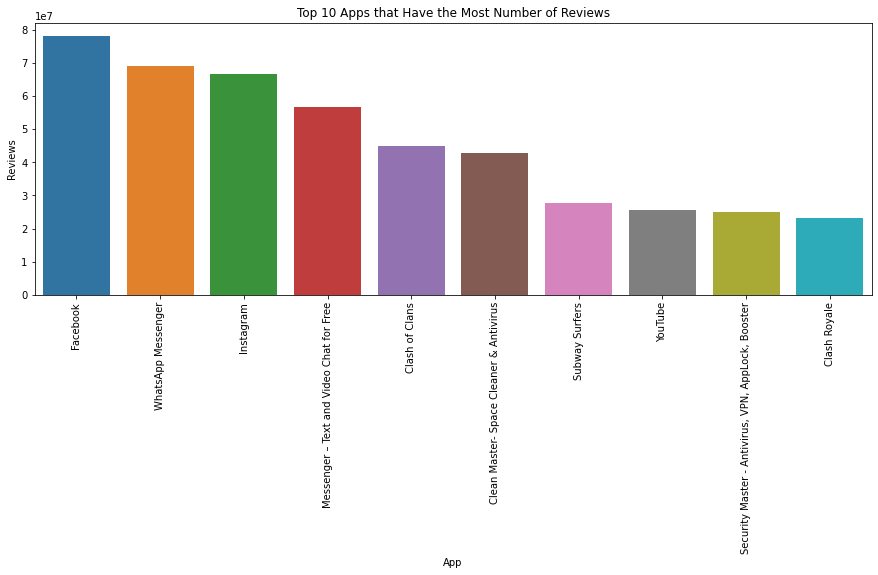

In [247]:
plt.figure(figsize = (15, 5))
sns.barplot(x='App', y='Reviews', data = data1_r_rank)
plt.xticks(rotation = 90)
plt.ylabel('Reviews')
plt.title('Top 10 Apps that Have the Most Number of Reviews')
plt.show()

In [248]:
### review 수 높은 순대로 정렬.
### Facebook, WhatsApp, Instagram, Messenger, Clash of Clans, Youtube 등 이름만 들어도 아는 어플들이 많음.
### review 수는 앱의 성공을 판단하는 데에 중요한 지표가 되지 않을까?

In [249]:
data1_i_rank = data1.sort_values(by = 'Installs', ascending = False)
data1_i_rank = data1_i_rank.head(20)
data1_i_rank

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
3896,Subway Surfers,GAME,4.5,27711703,76.0,1000000000,Free,0.0,Everyone 10+,4.1 and up
3943,Facebook,SOCIAL,4.1,78128208,13.0,1000000000,Free,0.0,Teen,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,13.0,1000000000,Free,0.0,Everyone,Varies with device
3523,Google Drive,PRODUCTIVITY,4.4,2731211,13.0,1000000000,Free,0.0,Everyone,Varies with device
3565,Google Drive,PRODUCTIVITY,4.4,2731211,13.0,1000000000,Free,0.0,Everyone,Varies with device
2884,Google Photos,PHOTOGRAPHY,4.5,10859051,13.0,1000000000,Free,0.0,Everyone,Varies with device
3665,YouTube,VIDEO_PLAYERS,4.3,25655305,13.0,1000000000,Free,0.0,Teen,Varies with device
2853,Google Photos,PHOTOGRAPHY,4.5,10858538,13.0,1000000000,Free,0.0,Everyone,Varies with device
4234,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,13.0,1000000000,Free,0.0,Everyone,Varies with device
3687,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384,13.0,1000000000,Free,0.0,Teen,Varies with device


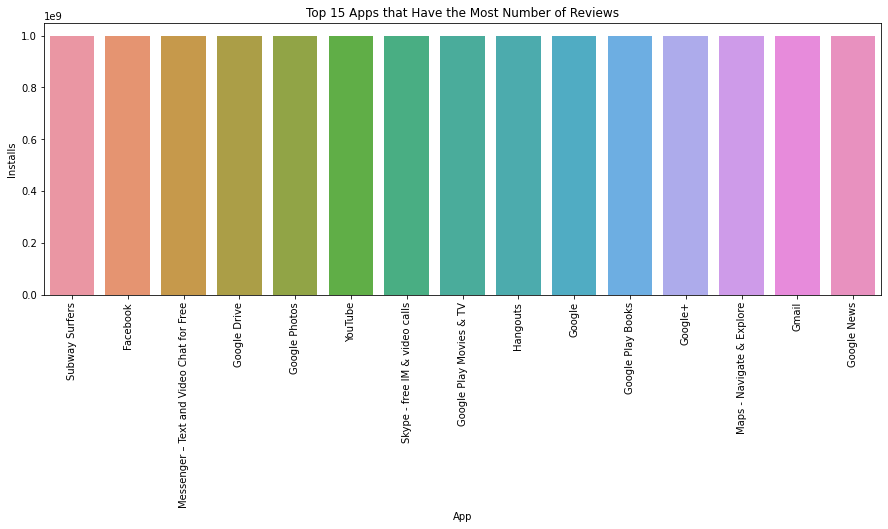

In [250]:
plt.figure(figsize = (15, 5))
sns.barplot(x='App', y='Installs', data = data1_i_rank)
plt.xticks(rotation = 90)
plt.ylabel('Installs')
plt.title('Top 15 Apps that Have the Most Number of Reviews')
plt.show()

In [251]:
### 그래프 상의 어플은 전부 다 installs 가 1000000000+ 임.
### 목록을 살펴보면 주로 일상 생활을 편리하게 하는 데에 도움을 주는 어플임. (지도, 메신저, 메일, 뉴스 등...)

## 실용적인 어플은 사람들이 필요에 의해 찾게 되니 다운로드 수가 많을 수밖에...?

In [252]:
### installs 가 많은 어플은 이름만 들어도 우리가 아는 어플임.
### 근데 이 어플들의 rating을 보면 좋지 않은 것도 많이 있음.

### rating은 어플의 성공에 큰 영향을 미치진 않을 것 같다...

In [253]:
category_share = ( data1.Category.value_counts() / data1.Category.value_counts().sum() ) * 100
category_share

FAMILY                 18.187690
GAME                   10.556427
TOOLS                   7.778906
MEDICAL                 4.272400
BUSINESS                4.244717
PRODUCTIVITY            3.912522
PERSONALIZATION         3.598782
COMMUNICATION           3.571099
SPORTS                  3.543416
LIFESTYLE               3.524961
FINANCE                 3.377318
HEALTH_AND_FITNESS      3.146627
PHOTOGRAPHY             3.091261
SOCIAL                  2.722156
NEWS_AND_MAGAZINES      2.611424
SHOPPING                2.399188
TRAVEL_AND_LOCAL        2.380733
DATING                  2.159269
BOOKS_AND_REFERENCE     2.131586
VIDEO_PLAYERS           1.614838
EDUCATION               1.439513
ENTERTAINMENT           1.374919
MAPS_AND_NAVIGATION     1.264188
FOOD_AND_DRINK          1.171911
HOUSE_AND_HOME          0.812033
AUTO_AND_VEHICLES       0.784350
LIBRARIES_AND_DEMO      0.784350
WEATHER                 0.756667
ART_AND_DESIGN          0.599797
EVENTS                  0.590569
PARENTING 

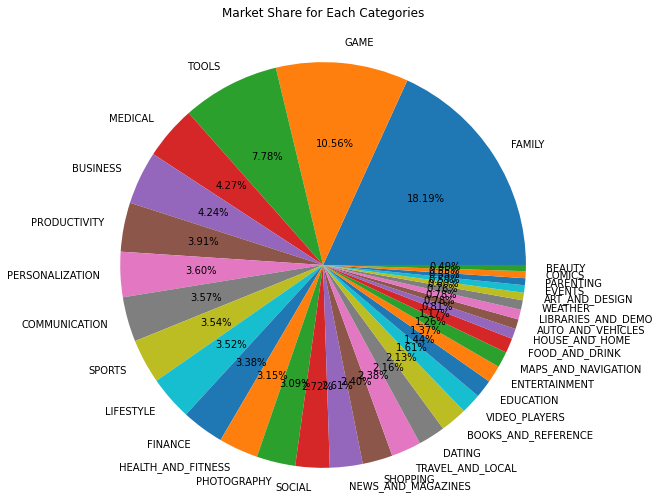

In [254]:
plt.figure(figsize=(8, 8))

category_share.plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.title('Market Share for Each Categories', pad = 30)
plt.axis('equal')
plt.show()

In [255]:
price_app = ( data1.Price.value_counts() / data1.Price.value_counts().sum() ) * 100
price_app

0.0      92.627111
1.0       1.845529
3.0       1.338009
2.0       1.033496
5.0       0.784350
4.0       0.719756
6.0       0.322968
10.0      0.221464
7.0       0.138415
400.0     0.119959
15.0      0.110732
8.0       0.083049
20.0      0.064594
30.0      0.064594
25.0      0.064594
9.0       0.064594
13.0      0.046138
12.0      0.046138
17.0      0.027683
14.0      0.027683
80.0      0.018455
19.0      0.018455
18.0      0.018455
40.0      0.018455
34.0      0.018455
11.0      0.018455
90.0      0.009228
31.0      0.009228
200.0     0.009228
29.0      0.009228
155.0     0.009228
47.0      0.009228
110.0     0.009228
16.0      0.009228
390.0     0.009228
38.0      0.009228
380.0     0.009228
300.0     0.009228
26.0      0.009228
75.0      0.009228
395.0     0.009228
Name: Price, dtype: float64

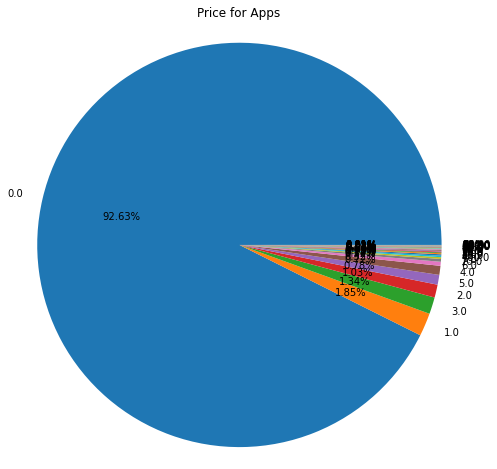

In [256]:
plt.figure(figsize=(8, 8))

price_app.plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.title('Price for Apps', pad = 10)
plt.axis('equal')
plt.show()

In [257]:
### 시장 점유율은 Family가 압도적으로 높음.
### Family, Game, Tools 순으로 ...

In [258]:
import matplotlib
import matplotlib.pyplot as plt 

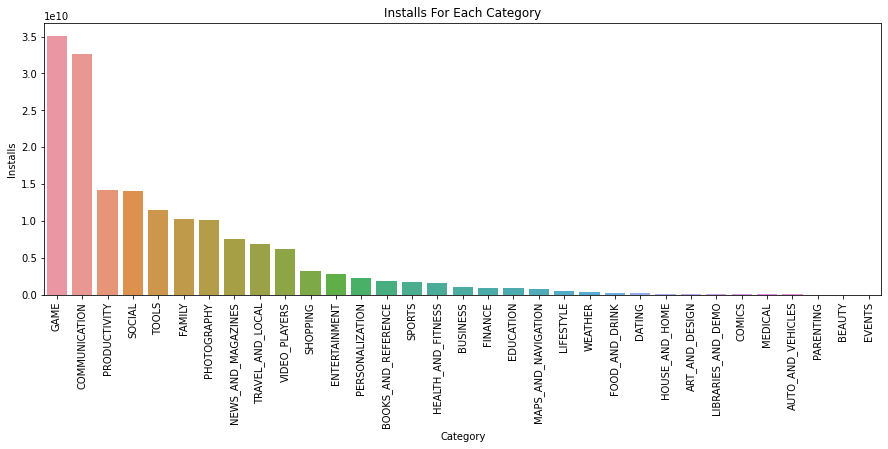

In [259]:
categories = data1.groupby('Category')
category_installs_sum = categories[['Installs']].sum()
category_installs_sum = category_installs_sum.reset_index()
category_installs_sum = category_installs_sum.sort_values(by = ['Installs'], ascending = False)

plt.figure(figsize=(15, 5))
sns.barplot(x='Category', y='Installs', data = category_installs_sum)
plt.xticks(rotation = 90)
plt.ylabel('Installs')
plt.title('Installs For Each Category')
plt.show()

In [260]:
### 'game'과 'communication' 분야의 어플이 다운로드 수가 가장 많았음.
### 다운로드 수가 많다는 건 그만큼 필요로 하는 사람이 많다는 것.

In [261]:
data1.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.063185,0.053525,0.045518,-0.019366
Reviews,0.063185,1.000000,0.104010,0.643119,-0.009634
Size,0.053525,0.104010,1.000000,0.047668,-0.019307
Installs,0.045518,0.643119,0.047668,1.000000,-0.011649
Price,-0.019366,-0.009634,-0.019307,-0.011649,1.000000


In [262]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns   

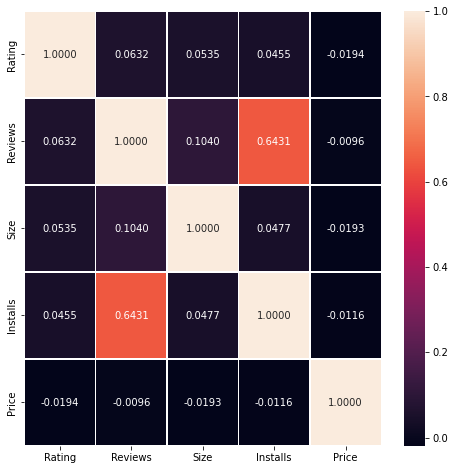

In [263]:
plt.figure(figsize=(8, 8))
sns.heatmap(data = data1.corr(), annot=True, fmt = '.4f', linewidths=.5)

In [264]:
### 일단 수치적으로 상관 계수가 높았던 것은 review 와 installs.
### 더 자세히 살펴봐야 알겠지만 review와 installs 간의 관계를 유심히 살펴보자.

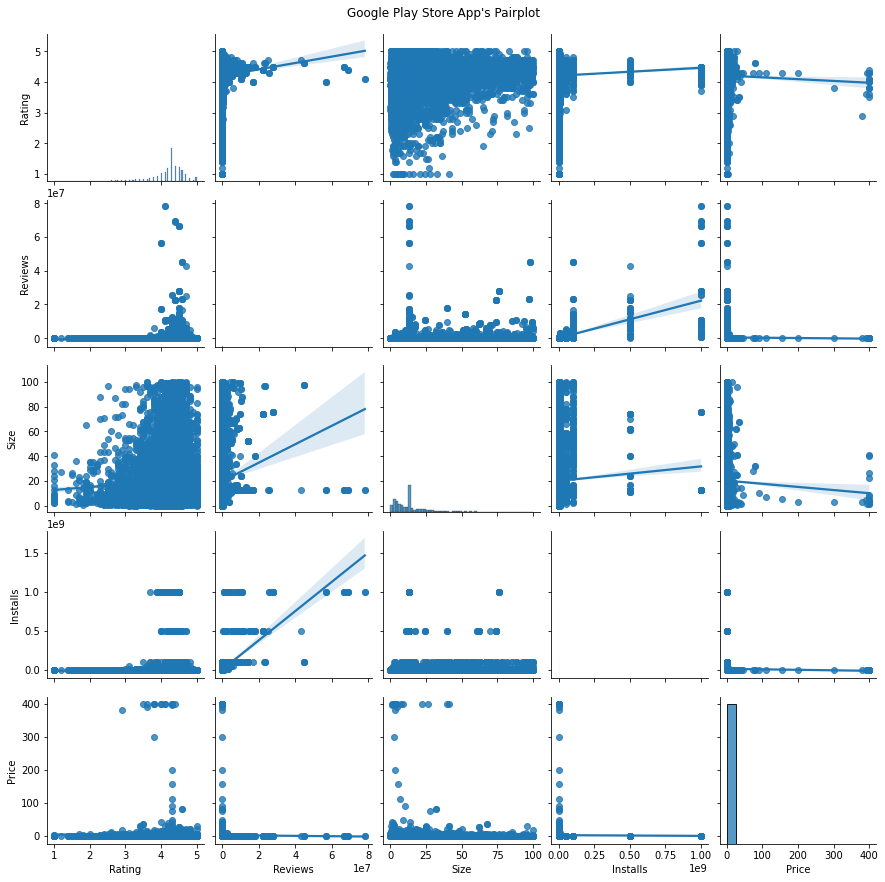

In [266]:
pp = sns.pairplot(data = data1, kind = "reg")
pp.fig.suptitle('Google Play Store App\'s Pairplot')
pp.fig.subplots_adjust(top = 0.95)

plt.show()

In [277]:
### pairplot으로 보니 price는 reviews와 installs와 뚜렷한 관계를 보이지 않음.
### 92%의 어플이 무료... 시장성을 챙기려면 무료로 어플을 공급해야 하지 않을까?

### size가 클수록 reviews와 installs 수가 어느 정도 커지는 것을 발견할 수 있음.
### size가 크다는 것은 곧 해당 어플에 담겨 있는 컨텐츠가 많다는 것을 의미함. 사용자가 즐길 거리가 더 많다는 거.

In [281]:
app_game = data1[data1['Category'] == 'GAME']
app_game.sort_values(by = 'Installs', ascending = False).head(30)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
1750,Subway Surfers,GAME,4.5,27724094,76.0,1000000000,Free,0.0,Everyone 10+,4.1 and up
1654,Subway Surfers,GAME,4.5,27722264,76.0,1000000000,Free,0.0,Everyone 10+,4.1 and up
1700,Subway Surfers,GAME,4.5,27723193,76.0,1000000000,Free,0.0,Everyone 10+,4.1 and up
1917,Subway Surfers,GAME,4.5,27725352,76.0,1000000000,Free,0.0,Everyone 10+,4.1 and up
3896,Subway Surfers,GAME,4.5,27711703,76.0,1000000000,Free,0.0,Everyone 10+,4.1 and up
1872,Subway Surfers,GAME,4.5,27725352,76.0,1000000000,Free,0.0,Everyone 10+,4.1 and up
1886,Temple Run 2,GAME,4.3,8119151,62.0,500000000,Free,0.0,Everyone,4.0 and up
1705,Candy Crush Saga,GAME,4.4,22428456,74.0,500000000,Free,0.0,Everyone,4.1 and up
1920,Temple Run 2,GAME,4.3,8119154,62.0,500000000,Free,0.0,Everyone,4.0 and up
1702,Pou,GAME,4.3,10485334,24.0,500000000,Free,0.0,Everyone,4.0 and up


<function matplotlib.pyplot.show>

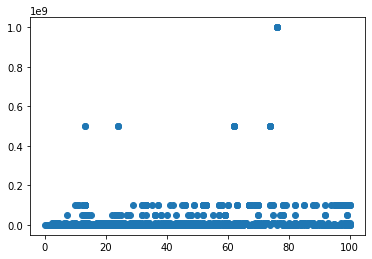

In [279]:
plt.scatter(app_game['Size'], app_game['Installs'])
plt.show